In [4]:
import ee
import geemap
from matplotlib import pyplot as plt 
import rasterio
from rasterio.plot import show

In [5]:
service_account = 'teste-api-key@sunlit-flag-449511-f7.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account,'layer/api_key_test.json')
ee.Initialize(credentials,project='ee-reginaldosg')


In [ ]:
dataset = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2').filterDate(
    '2022-01-01', '2022-02-01'
)


# Applies scaling factors.
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )


dataset = dataset.map(apply_scale_factors)

visualization = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

m = geemap.Map()
m.set_center(-114.2579, 38.9275, 8)
m.add_layer(dataset, visualization, 'True Color (432)')
m

In [ ]:
def mask_s2_clouds(image):
  """Masks clouds in a Sentinel-2 image using the QA band.

  Args:
      image (ee.Image): A Sentinel-2 image.

  Returns:
      ee.Image: A cloud-masked Sentinel-2 image.
  """
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloud_bit_mask = 1 << 10
  cirrus_bit_mask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = (
      qa.bitwiseAnd(cloud_bit_mask)
      .eq(0)
      .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
  )

  return image.updateMask(mask).divide(10000)


dataset = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterDate('2020-01-01', '2020-01-30')
    # Pre-filter to get less cloudy granules.
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
    .map(mask_s2_clouds)
)

visualization = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],
}

m = geemap.Map()
m.set_center(83.277, 17.7009, 12)
m.add_layer(dataset.mean(), visualization, 'RGB')
m

In [ ]:
sentinel2 = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
    .filterDate("2023-01-01", "2023-12-31") \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20))  \
    .map(mask_s2_clouds)\
    .filterBounds(ee.Geometry.Point([-47.8825, -15.7942]))  # Brasília, Brasil

m2 = geemap.Map()
m2.add_layer(sentinel2.mean(),visualization,'RGB')
m2



In [9]:
# ndvi = sentinel2.median().normalizedDifference(['B8', 'B4'])

# plt.imshow(ndvi, cmap='viridis')
# plt.colorbar()

In [21]:
img = rasterio.open('../../imagens/imagem_teste_NDVI.tif')
full_img = img.read()
num_bands = img.count
num_bands


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


4

In [27]:
full_img

array([[[0.2132, 0.0926, 0.0417, ..., 0.1334, 0.145 , 0.167 ],
        [0.195 , 0.0987, 0.0186, ..., 0.1516, 0.187 , 0.203 ],
        [0.1722, 0.0772, 0.0344, ..., 0.1974, 0.209 , 0.1928],
        ...,
        [0.1572, 0.1966, 0.1546, ..., 0.0346, 0.0339, 0.0606],
        [0.135 , 0.1366, 0.175 , ..., 0.0254, 0.0422, 0.0488],
        [0.1474, 0.113 , 0.1396, ..., 0.0243, 0.034 , 0.0424]],

       [[0.1974, 0.0882, 0.0439, ..., 0.122 , 0.1204, 0.1566],
        [0.1922, 0.0833, 0.015 , ..., 0.1444, 0.1732, 0.206 ],
        [0.174 , 0.0689, 0.0301, ..., 0.1964, 0.2042, 0.187 ],
        ...,
        [0.1372, 0.147 , 0.116 , ..., 0.058 , 0.052 , 0.0654],
        [0.1174, 0.1018, 0.104 , ..., 0.0544, 0.0677, 0.0594],
        [0.1378, 0.0952, 0.1004, ..., 0.054 , 0.0591, 0.055 ]],

       [[0.1822, 0.0678, 0.0392, ..., 0.105 , 0.117 , 0.1456],
        [0.1614, 0.0762, 0.0201, ..., 0.133 , 0.1618, 0.1918],
        [0.1394, 0.0684, 0.0269, ..., 0.1918, 0.2018, 0.1792],
        ...,
        [0.0

In [22]:
img_band1 = img.read(1)
img_band2 = img.read(2)
img_band3 = img.read(3)
img_band4 = img.read(4)
img_band4


array([[0.2004, 0.1037, 0.0512, ..., 0.1705, 0.1624, 0.1761],
       [0.2014, 0.0912, 0.0228, ..., 0.1807, 0.1926, 0.1978],
       [0.1961, 0.0928, 0.0475, ..., 0.1881, 0.1852, 0.1829],
       ...,
       [0.2054, 0.249 , 0.1599, ..., 0.3312, 0.3237, 0.2994],
       [0.1918, 0.2649, 0.2381, ..., 0.4048, 0.3736, 0.2817],
       [0.1851, 0.2114, 0.2377, ..., 0.414 , 0.362 , 0.3094]],
      shape=(200, 200), dtype=float32)

Text(0.5, 1.0, 'Band 4: B08')

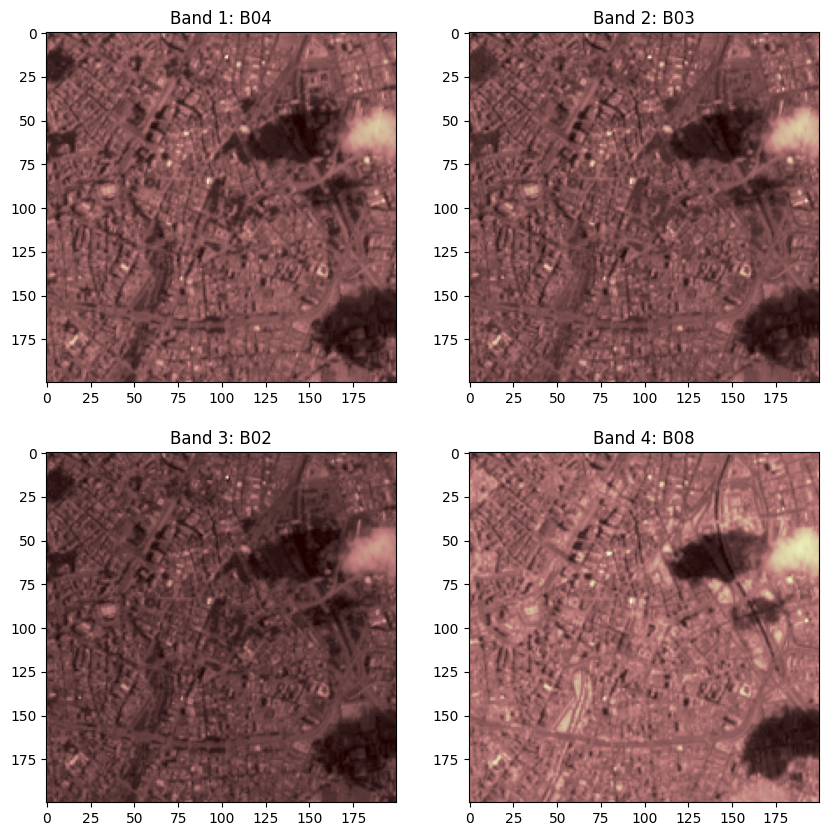

In [25]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='pink')
ax1.set_title('Band 1: B04')


ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='pink')
ax2.set_title('Band 2: B03')


ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(img_band3, cmap='pink')
ax3.set_title('Band 3: B02')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_band4, cmap='pink')
ax4.set_title('Band 4: B08')


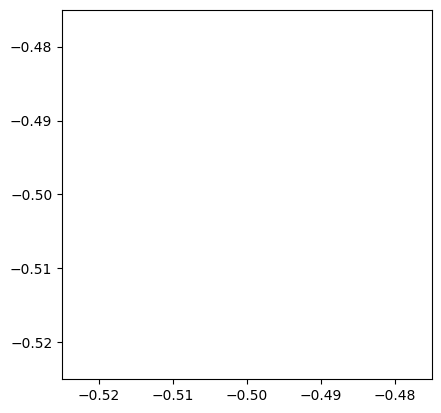

In [26]:
clipped_img = full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])

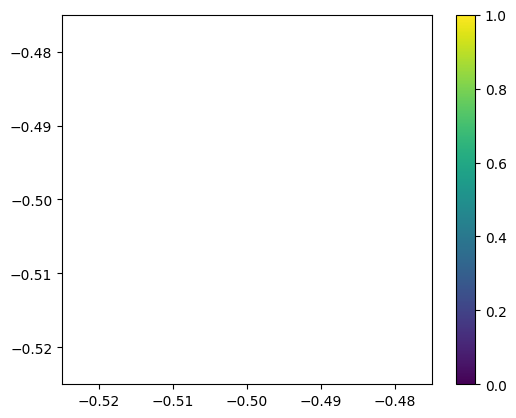

In [29]:
red_clipped = clipped_img[0].astype('f4')
red_clipped
nir_clipped = clipped_img[3].astype('f4')  
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped) ##Isso basicamente seria a conta do ndvi, mas como meu tiff só tem uma band, não tem como fazer

plt.imshow(ndvi_clipped, cmap='viridis')
plt.colorbar()